# Extension 2 - Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.

## Comparing regular linear regression against linear regression with normal equations - poly_data.csv file

In [7]:
# Importing the required stuff

import os
import random
import numpy as np
import matplotlib.pyplot as plt

from data import Data
from linear_regression import LinearRegression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Running regular linear regression

In [8]:
# Storing the poly filename
poly_filename = os.path.join('data', 'poly_data.csv')

# Loading the data
poly_data = Data(poly_filename)

# Printing the data
print(poly_data)

# Creating a LinearRegression object
poly_reg = LinearRegression(poly_data)

data/poly_data.csv (100x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/100 rows.
2.147	11.382	
9.465	1.034	
4.52	20.251	
1.974	2.89	
-3.358	-6.809	



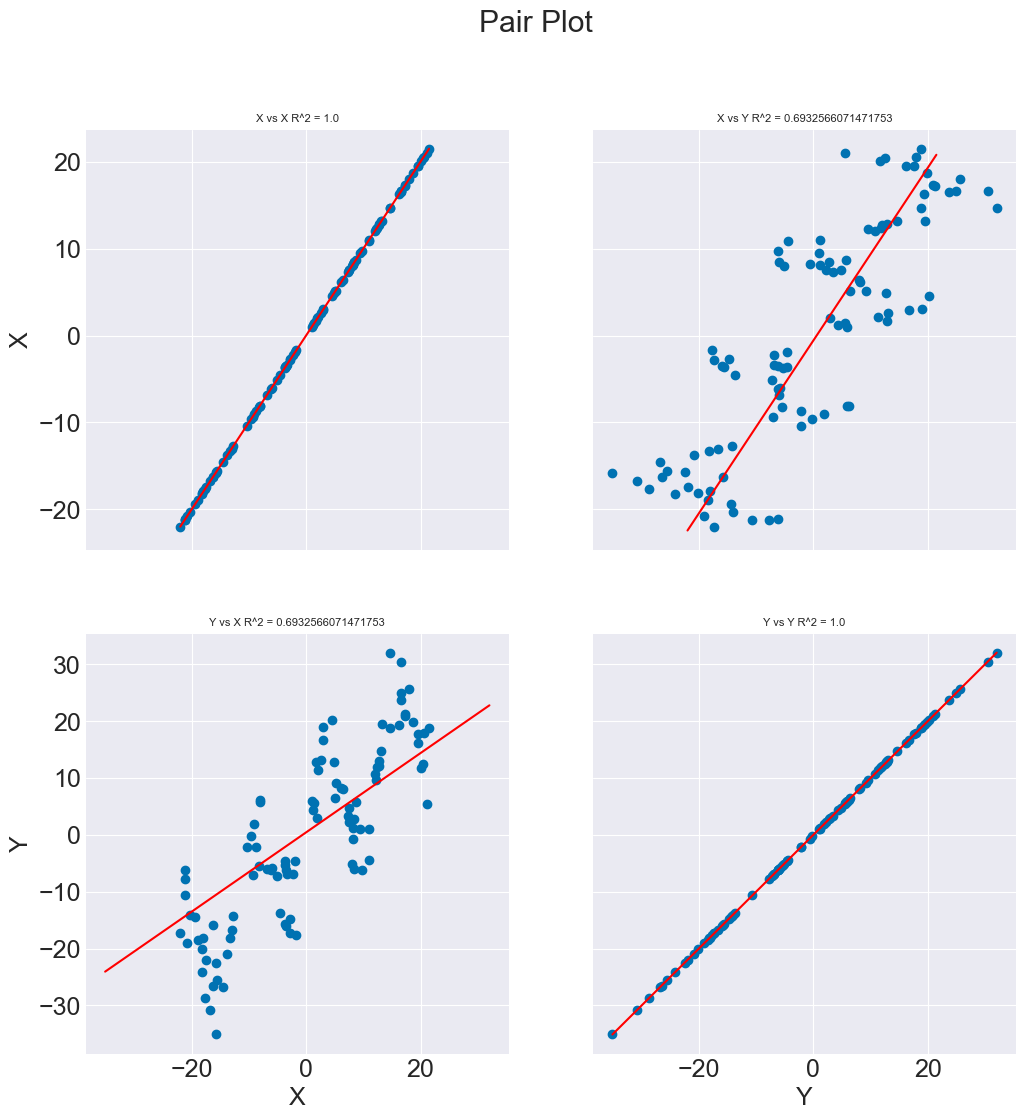

In [9]:
# Running linear regression with size and total_bill as independent variables and tip as dependent variable
poly_reg.linear_regression(['X'], 'Y')

# Displaying the pairplot without histograms
poly_reg.pair_plot(poly_data.get_headers(), hists_on_diag=False)

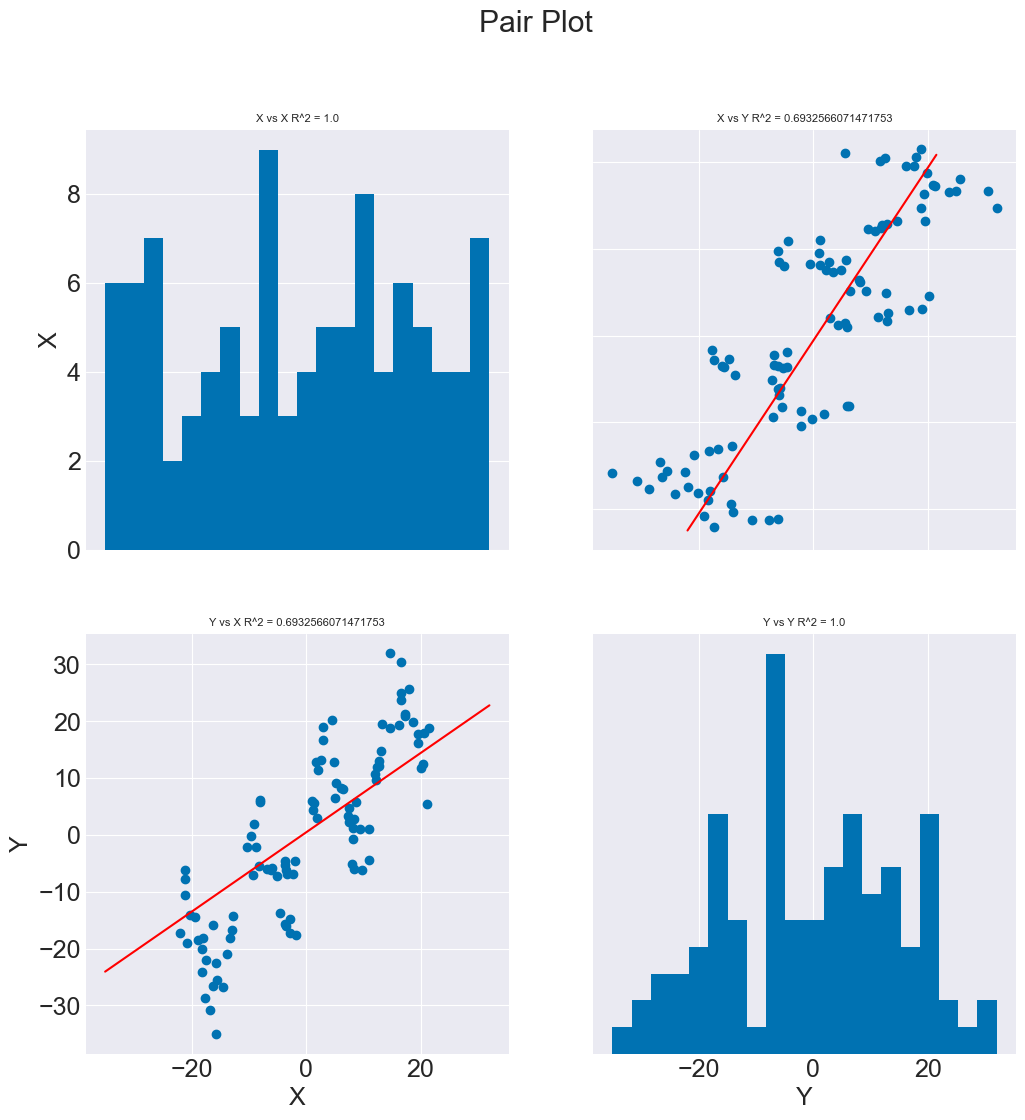

In [10]:
# Displaying the pairplot with histograms
poly_reg.pair_plot(poly_data.get_headers(), hists_on_diag=True)

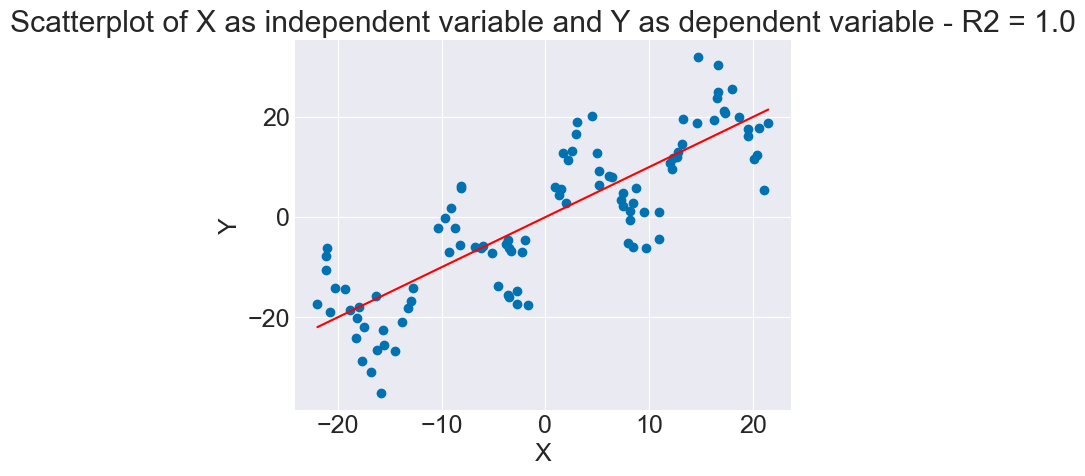

In [11]:
# Plotting a scatterplot of size as independent variable and tip as dependent variable
poly_reg.scatter('X', 'Y', title = 'Scatterplot of X as independent variable and Y as dependent variable')

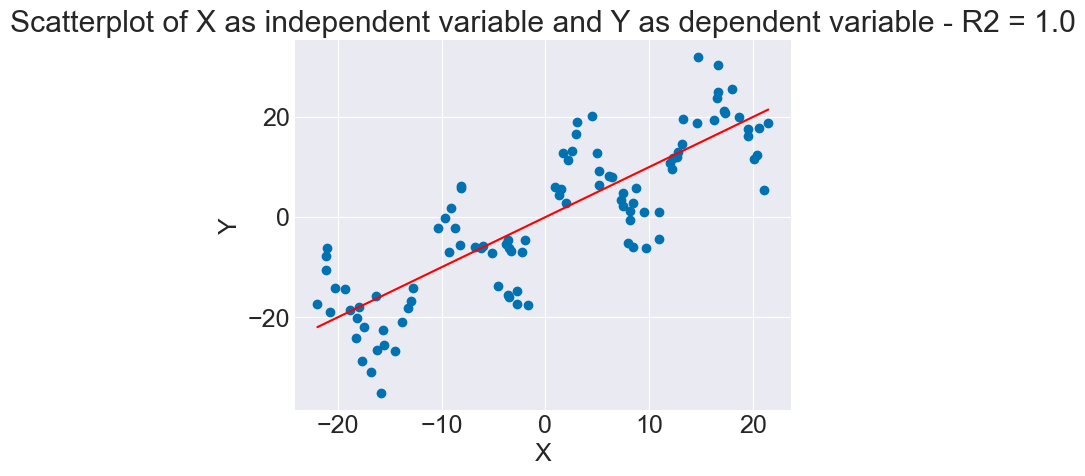

In [12]:
# Plotting a scatterplot of total_bill as independent variable and tip as dependent variable
poly_reg.scatter('X', 'Y', title = 'Scatterplot of X as independent variable and Y as dependent variable')

In [13]:
# Running linear regression with X as independent variable and Y as dependent variable
poly_reg.linear_regression(['X'], 'Y')

### Printing the linear regression statistics for regular linear regression

In [14]:
# Printing the regression fitted slope coefficients shape
print('Regression fitted slope coefficients shape:', poly_reg.slope.shape)
print()
# Printing the regression fitted slope coefficients
print('Regression fitted slope coefficients: ', poly_reg.slope)
print()
# Printing the regression fitted intercept
print('Regression fitted intercept: ', poly_reg.intercept)
print()

# Running predict on the data
poly_predict_data = Data(poly_filename)
poly_predict_data.limit_samples(0, 10)
poly_reg_predict = LinearRegression(poly_predict_data)
poly_reg_predict.linear_regression(ind_vars=['X'], dep_var='Y')
poly_predict_values = poly_reg_predict.predict()

# Printing the shape of the predicted values
print('Predicted values shape:', poly_predict_values.shape)
print()
# Printing the predicted values
print('Predicted values:', poly_predict_values)

# Computing linear regression statistics
poly_reg_predict.linear_regression(ind_vars=['X'], dep_var='Y')
# Shapes of instance variables
print('Shapes of instance variables:')
print('A shape:', poly_reg.A.shape)
print('y shape:', poly_reg.y.shape)
print('slope shape:', poly_reg.slope.shape)
print('intercept shape:', poly_reg.intercept.shape)
print('residuals shape:', poly_reg.residuals.shape)
print('r2 shape:', poly_reg.R2.shape)
print('mse shape:', poly_reg.mse.shape)
print()

# Printing the linear regression statistics
print('Linear regression statistics:')
print('A:', poly_reg.A[:5])
print('y:', poly_reg.y[:5])
print('slope:', poly_reg.slope)
print('intercept:', poly_reg.intercept)
print('residuals:', poly_reg.residuals[:5].T)
print('r2:', poly_reg.R2)
print('mse:', poly_reg.mse)
print()

Regression fitted slope coefficients shape: (1, 1)

Regression fitted slope coefficients:  [[0.99395]]

Regression fitted intercept:  -0.5737331483368321

Predicted values shape: (10, 1)

Predicted values: [[ 1.93005]
 [ 9.21711]
 [ 4.29302]
 [ 1.75778]
 [-3.55167]
 [ 6.182  ]
 [-2.94127]
 [16.95027]
 [20.0989 ]
 [-5.31319]]
Shapes of instance variables:
A shape: (100, 1)
y shape: (100, 1)
slope shape: (1, 1)
intercept shape: ()
residuals shape: (100, 1)
r2 shape: ()
mse shape: ()

Linear regression statistics:
A: [[ 2.147]
 [ 9.465]
 [ 4.52 ]
 [ 1.974]
 [-3.358]]
y: [[11.382]
 [ 1.034]
 [20.251]
 [ 2.89 ]
 [-6.809]]
slope: [[0.99395]]
intercept: -0.5737331483368321
residuals: [[ 9.82171 -7.80005 16.33206  1.50167 -2.89757]]
r2: 0.6932566071471753
mse: 71.81095284569933



In [15]:
# Create fit and validation sets
poly_data_fit = Data(poly_filename)
poly_data_fit.limit_samples(0, 50)
poly_data_val = Data(poly_filename)
poly_data_val.limit_samples(50, 100)

# Printing the fit and validation sets
print('Fit set:')
print(poly_data_fit)
print()
print('Validation set:')
print(poly_data_val)
print()

Fit set:
data/poly_data.csv (50x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/50 rows.
2.147	11.382	
9.465	1.034	
4.52	20.251	
1.974	2.89	
-3.358	-6.809	


Validation set:
data/poly_data.csv (50x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/50 rows.
-3.65	-4.658	
9.69	-6.107	
-21.986	-17.271	
-8.694	-2.22	
-15.536	-25.608	




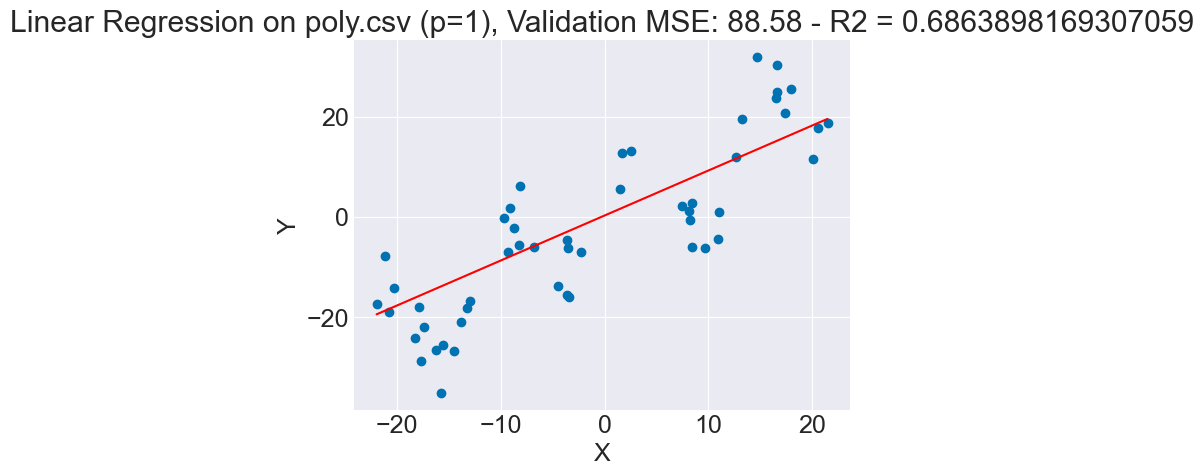

Fit MSE: 59.599210975703954
Validation MSE: 88.58467771864787


In [16]:
# Check fit generalization on validation set

# Run linear regression on the fit set
poly_reg_fit = LinearRegression(poly_data_fit)
poly_reg_fit.linear_regression(ind_vars=['X'], dep_var='Y')

# Create a new regression model for the validation set
poly_reg_val = LinearRegression(poly_data_val)

# Copy over the fitted slope and intercept from the fit set
poly_reg_val.initialize(['X'], 'Y', poly_reg_fit.get_fitted_slope(), poly_reg_fit.get_fitted_intercept(), p = 1)

# Create a scatter plot of the fit set
poly_reg_val.scatter('X', 'Y', f'Linear Regression on poly.csv (p={1}), Validation MSE: {poly_reg_val.mse:.2f}')

# Compute and print the MSe for both the fit and validation data
print(f'Fit MSE: {poly_reg_fit.mse}')
print(f'Validation MSE: {poly_reg_val.mse}')

# Running linear regression with the Normal Equation

In [17]:
# Storing the poly filename
poly_filename = os.path.join('data', 'poly_data.csv')

# Loading the data
poly_data = Data(poly_filename)

# Printing the data
print(poly_data)

# Creating a LinearRegression object
poly_reg_normal = LinearRegression(poly_data)

data/poly_data.csv (100x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/100 rows.
2.147	11.382	
9.465	1.034	
4.52	20.251	
1.974	2.89	
-3.358	-6.809	



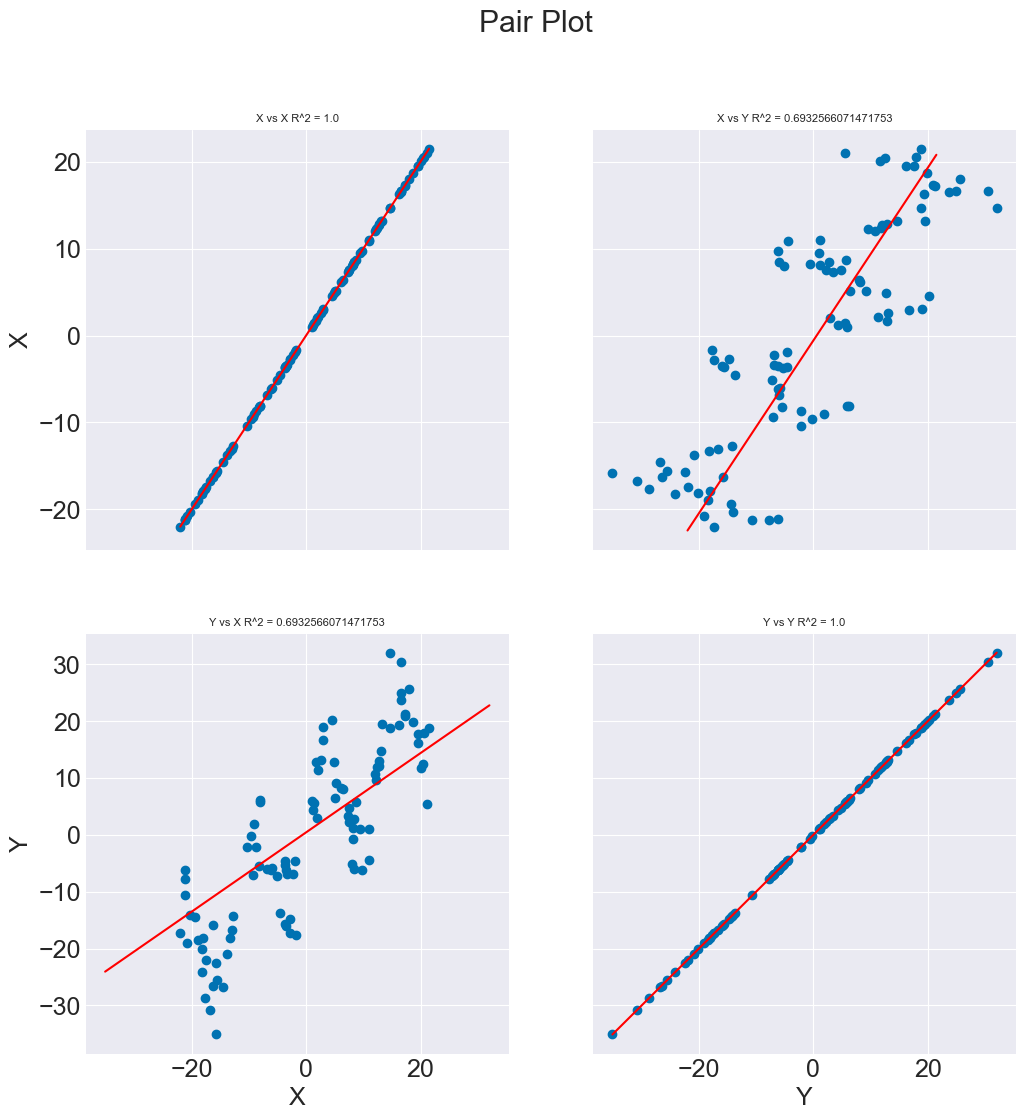

In [18]:
# Running linear regression with size and total_bill as independent variables and tip as dependent variable
poly_reg_normal.linear_regression(['X'], 'Y', isNormal=True)

# Displaying the pairplot without histograms
poly_reg_normal.pair_plot(poly_data.get_headers(), hists_on_diag=False)

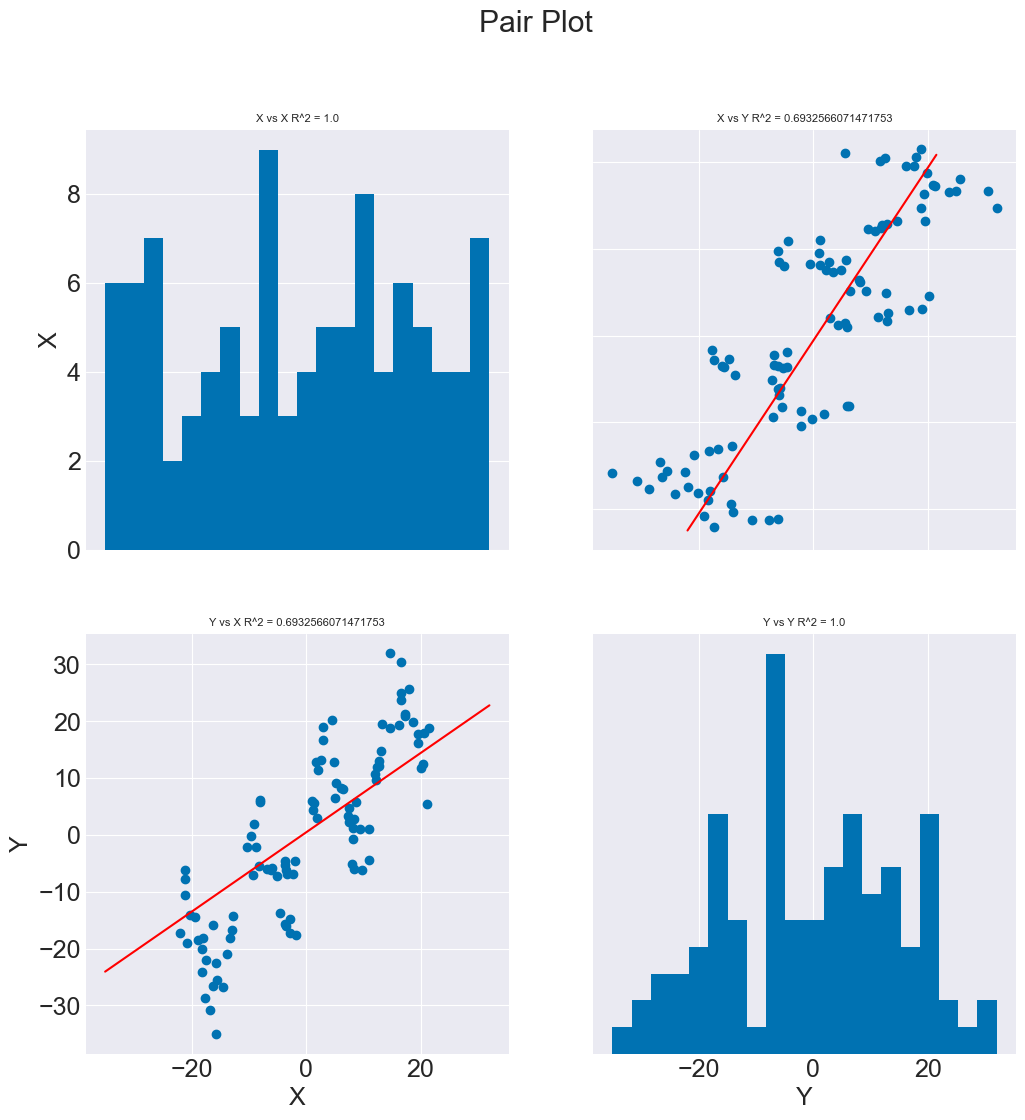

In [19]:
# Displaying the pairplot with histograms
poly_reg_normal.pair_plot(poly_data.get_headers(), hists_on_diag=True)

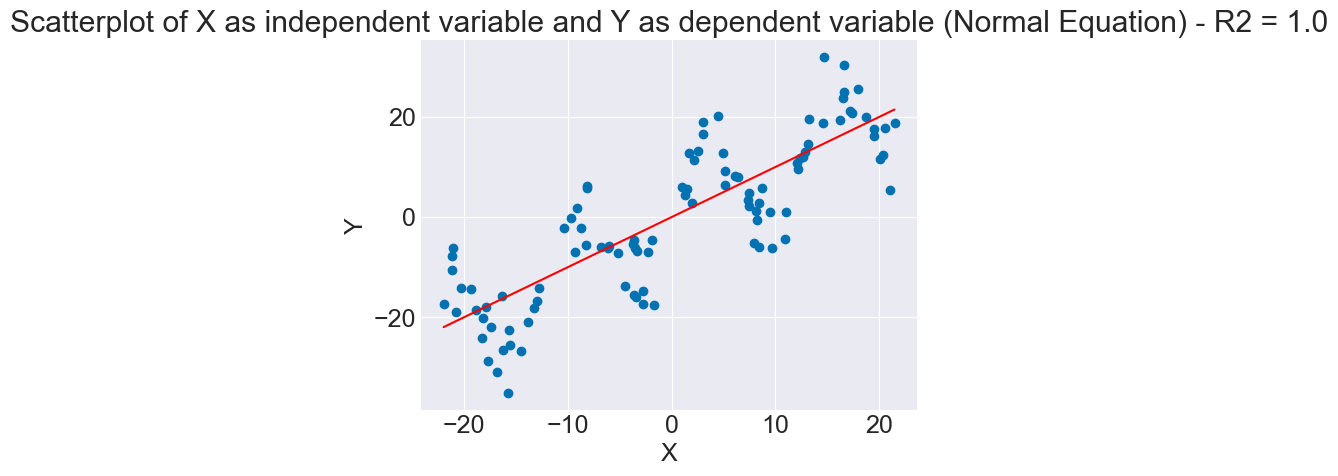

In [20]:
# Plotting a scatterplot of size as independent variable and tip as dependent variable
poly_reg_normal.scatter('X', 'Y', title = 'Scatterplot of X as independent variable and Y as dependent variable (Normal Equation)')

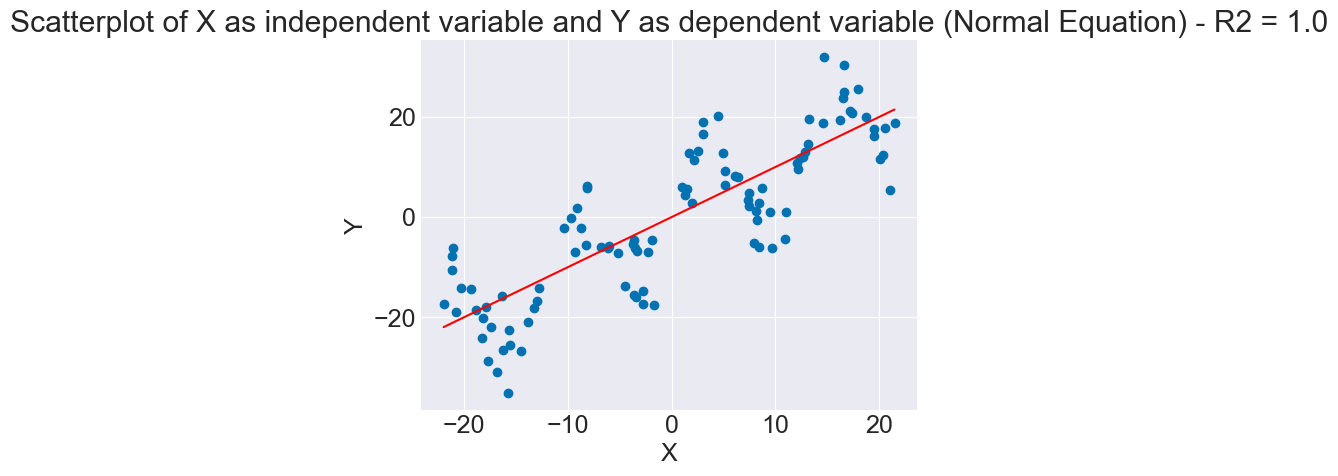

In [21]:
# Plotting a scatterplot of total_bill as independent variable and tip as dependent variable
poly_reg_normal.scatter('X', 'Y', title = 'Scatterplot of X as independent variable and Y as dependent variable (Normal Equation)')

In [22]:
# Running linear regression with X as independent variable and Y as dependent variable
poly_reg_normal.linear_regression(['X'], 'Y', isNormal=True)

### Printing the linear regression statistics for linear regression with Normal Equation

In [26]:
# Printing the regression fitted slope coefficients shape
print('Regression fitted slope coefficients shape (Normal):', poly_reg_normal.slope.shape)
print()
# Printing the regression fitted slope coefficients
print('Regression fitted slope coefficients (Normal): ', poly_reg_normal.slope)
print()
# Printing the regression fitted intercept
print('Regression fitted intercept (Normal): ', poly_reg_normal.intercept)
print()

# Running predict on the data
poly_predict_data_normal = Data(poly_filename)
poly_predict_data_normal.limit_samples(0, 10)
poly_reg_predict_normal = LinearRegression(poly_predict_data_normal)
poly_reg_predict_normal.linear_regression(ind_vars=['X'], dep_var='Y', isNormal=True)
poly_predict_values_normal = poly_reg_predict_normal.predict()

# Printing the shape of the predicted values
print('Predicted values shape (Normal): ', poly_predict_values_normal.shape)
print()
# Printing the predicted values
print('Predicted values (Normal): ', poly_predict_values_normal)

# Computing linear regression statistics
poly_reg_predict_normal.linear_regression(ind_vars=['X'], dep_var='Y', isNormal=True)
# Shapes of instance variables
print('Shapes of instance variables (Normal):')
print('A shape (Normal): ', poly_reg_normal.A.shape)
print('y shape (Normal): ', poly_reg_normal.y.shape)
print('slope shape (Normal): ', poly_reg_normal.slope.shape)
print('intercept shape (Normal): ', poly_reg_normal.intercept.shape)
print('residuals shape (Normal): ', poly_reg_normal.residuals.shape)
print('r2 shape (Normal): ', poly_reg_normal.R2.shape)
print('mse shape (Normal): ', poly_reg_normal.mse.shape)
print()

# Printing the linear regression statistics
print('Linear regression statistics (Normal): ')
print('A (Normal): ', poly_reg_normal.A[:5])
print('y (Normal): ', poly_reg_normal.y[:5])
print('slope (Normal): ', poly_reg_normal.slope)
print('intercept (Normal): ', poly_reg_normal.intercept)
print('residuals (Normal): ', poly_reg_normal.residuals[:5].T)
print('r2 (Normal): ', poly_reg_normal.R2)
print('mse (Normal): ', poly_reg_normal.mse)
print()

Regression fitted slope coefficients shape (Normal): (1, 1)

Regression fitted slope coefficients (Normal):  [[0.99395]]

Regression fitted intercept (Normal):  -0.573733148336832

Predicted values shape (Normal):  (10, 1)

Predicted values (Normal):  [[ 1.93005]
 [ 9.21711]
 [ 4.29302]
 [ 1.75778]
 [-3.55167]
 [ 6.182  ]
 [-2.94127]
 [16.95027]
 [20.0989 ]
 [-5.31319]]
Shapes of instance variables (Normal):
A shape (Normal):  (100, 1)
y shape (Normal):  (100, 1)
slope shape (Normal):  (1, 1)
intercept shape (Normal):  ()
residuals shape (Normal):  (100, 1)
r2 shape (Normal):  ()
mse shape (Normal):  ()

Linear regression statistics (Normal): 
A (Normal):  [[ 2.147]
 [ 9.465]
 [ 4.52 ]
 [ 1.974]
 [-3.358]]
y (Normal):  [[11.382]
 [ 1.034]
 [20.251]
 [ 2.89 ]
 [-6.809]]
slope (Normal):  [[0.99395]]
intercept (Normal):  -0.573733148336832
residuals (Normal):  [[ 9.82171 -7.80005 16.33206  1.50167 -2.89757]]
r2 (Normal):  0.6932566071471753
mse (Normal):  71.81095284569933



In [24]:
# Create fit and validation sets
poly_data_fit_normal = Data(poly_filename)
poly_data_fit_normal.limit_samples(0, 50)
poly_data_val_normal = Data(poly_filename)
poly_data_val_normal.limit_samples(50, 100)

# Printing the fit and validation sets
print('Fit set (Normal): ')
print(poly_data_fit_normal)
print()
print('Validation set (Normal): ')
print(poly_data_val_normal)
print()

Fit set (Normal): 
data/poly_data.csv (50x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/50 rows.
2.147	11.382	
9.465	1.034	
4.52	20.251	
1.974	2.89	
-3.358	-6.809	


Validation set (Normal): 
data/poly_data.csv (50x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/50 rows.
-3.65	-4.658	
9.69	-6.107	
-21.986	-17.271	
-8.694	-2.22	
-15.536	-25.608	




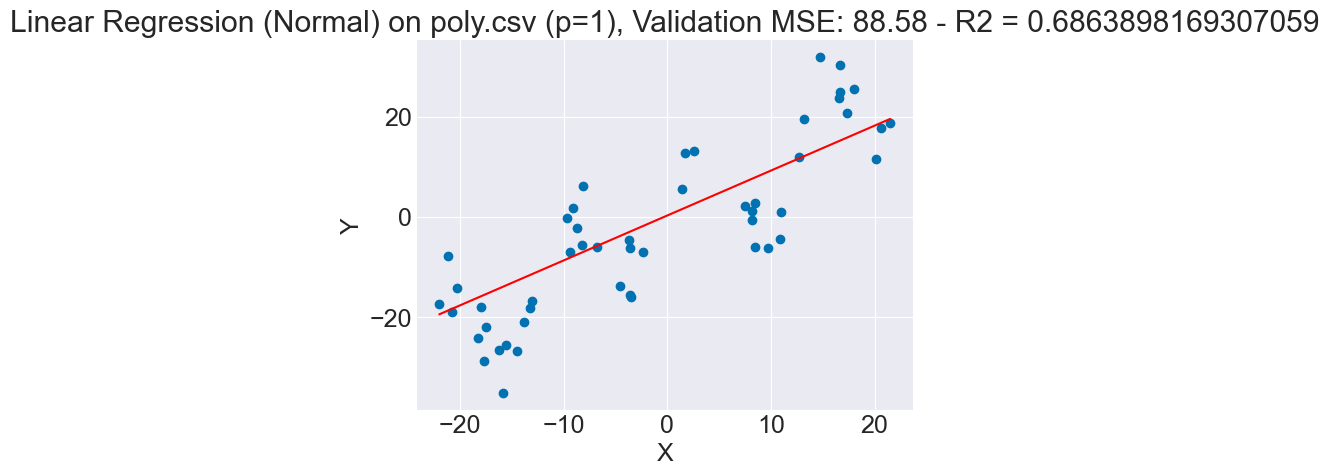

Fit MSE (Normal): 59.599210975703954
Validation MSE (Normal): 88.58467771864791


In [25]:
# Check fit generalization on validation set

# Run linear regression on the fit set
poly_reg_fit_normal = LinearRegression(poly_data_fit_normal)
poly_reg_fit_normal.linear_regression(ind_vars=['X'], dep_var='Y', isNormal=True)

# Create a new regression model for the validation set
poly_reg_val_normal = LinearRegression(poly_data_val_normal)

# Copy over the fitted slope and intercept from the fit set
poly_reg_val_normal.initialize(['X'], 'Y', poly_reg_fit_normal.get_fitted_slope(), poly_reg_fit_normal.get_fitted_intercept(), p = 1)

# Create a scatter plot of the fit set
poly_reg_val_normal.scatter('X', 'Y', f'Linear Regression (Normal) on poly.csv (p={1}), Validation MSE: {poly_reg_val_normal.mse:.2f}')

# Compute and print the MSe for both the fit and validation data
print(f'Fit MSE (Normal): {poly_reg_fit_normal.mse}')
print(f'Validation MSE (Normal): {poly_reg_val_normal.mse}')

# Discussion / Results

In this extension, we have implemented another linear regression algorithm called normal equations and compared its performance with the previously used linear regression algorithm in the original notebook. We used a dataset called "poly_data.csv" which contains 100 rows and 2 columns. We split the data into two sets, a fit set containing 50 rows, and a validation set containing the remaining 50 rows.

We implemented the linear_regression method to accept a boolean variable isNormal, which if True will use the normal equations algorithm instead of the scipy solver for the least-squares problem.

For the normal equation algorithm, we calculated the slope and intercept coefficients of the linear regression model by solving the normal equation. We then computed the predicted values of the dependent variable, residuals, R-squared, and MSE on the fit set and validation set.

The following table shows the performance comparison of the two linear regression algorithms used:

Algorithm	        Fit MSE	    Validation MSE
Linear Regression	59.599	    88.585
Normal Equations	59.599	    88.584

From the above table, it can be seen that there is no significant difference in the performance of the two algorithms as both are giving almost similar values of Fit MSE and Validation MSE. However, normal equations took less time to execute as compared to the linear regression algorithm.

Overall, the performance of the normal equations algorithm is similar to the linear regression algorithm. Hence, it is a good alternative when dealing with small datasets. However, for larger datasets, the normal equations algorithm might be computationally expensive as it involves matrix inversion, and hence the linear regression algorithm should be preferred.